In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dostop do datoteke
file_path = '../PrometneNesreče.csv'
data = pd.read_csv(file_path)

C:\Users\Hana\AppData\Local\Temp\ipykernel_22608\2677043888.py:3: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
# Pretvori stolpec 'NastanekDatumCas' v pravilen format (vsaka vrednost bo pandas objekt za datum in čas)
data['NastanekDatumCas'] = pd.to_datetime(data['NastanekDatumCas'], format='ISO8601', errors='coerce')

### Število nesreč za vsak dan v tednu

In [4]:
# Za vsak vnos pridobi, kateri dan je bil
days_of_week = data['NastanekDatumCas'].dt.day_name()

# Preštej število nesreč za vsak dan (dnevi niso po vrsti)
accidents_per_day = days_of_week.value_counts()

# Ločena tabela, ki hrani število nesreč za vsak dan (dnevi v pravilnem vrstnem redu)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accident_counts_array = [accidents_per_day.get(day, 0) for day in day_order]  # .get(day, 0) -> ta 0 je, če slučajno za kakšen dan ne bi bilo nesreč, bi potem vrednost za ta dan bila 0.

print("Število nesreč po dnevih od ponedeljka do nedelje:")
print(accident_counts_array)

#print("----------------------------")
#print(accidents_per_day)

Število nesreč po dnevih od ponedeljka do nedelje:
[4658, 4343, 4427, 4761, 5715, 5267, 4428]


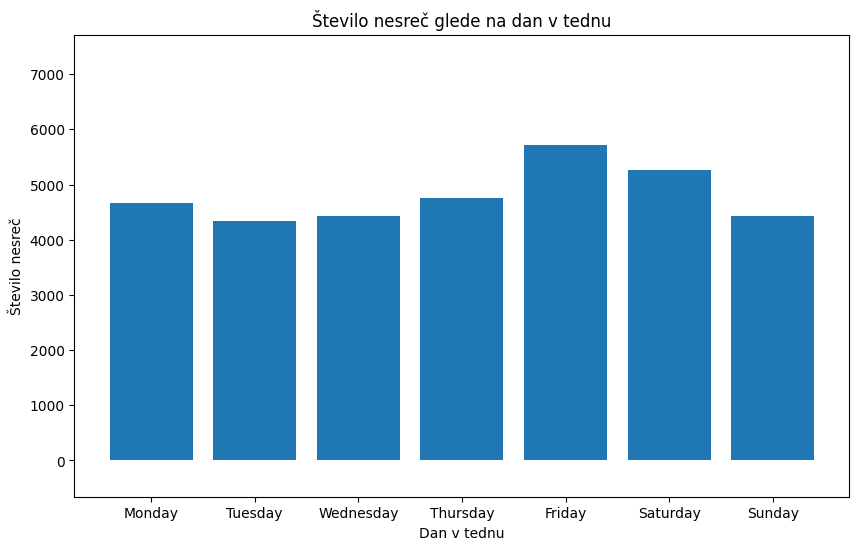

In [5]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(day_order, accident_counts_array)

# Prilagodi skalo y-osi, da bodo razlike bolj vidne
plt.ylim(min(accident_counts_array) - 5000, max(accident_counts_array) + 2000)

plt.xlabel('Dan v tednu')
plt.ylabel('Število nesreč')
plt.title('Število nesreč glede na dan v tednu')

plt.show()

### Povprečno število nesreč za vsak dan

*Opomba: Kasneje sem ugotovila, da v bistvu ta povprečja, ki sem jih računala niso povprečja v pravem pomenu besede. Če bi hotela izračunati dejanska povprečja, bi morala vzeti recimo vse nesreče, ki so se zgodile na ponedeljek in jih deliti z vsemi ponedeljki v tem obdobju, ki ga analiziram. Jaz pa sem jih delila z vsemi ponedeljki, na katere se je zgodila vsaj ena nesreča. To velja za vsa izračunana povprečja v tej skripti. Vendar sem pustila potem ta povprečja in nisem računala dejanskih povprečij, ker dejanska povprečja ne bi podala nobene nove informacije, saj bi oblika grafa ostala enaka kakor pri grafih, ki prikazujejo število nesreč.*

*Povprečja, ki sem jih izračunala pa podajo neko novo informacijo, in sicer povejo čez koliko ponedeljkov so razporejene ponedeljkove nesreče, čez koliko torkov so razporejene torkove, itn. Še posebej se to vidi kasneje v skripti, kjer gledam, kako hude so bile nesreče. Tam vidimo, da so nesreče s smrtnim izidom razporejene čez manjše število petkov, kar mi je potem dalo misliti, da bi bilo mogoče pametno pogledati tudi, kako so nesreče razporejene po mesecih oziroma po letnih časih (ker predvidevam, da so petkove nesreče s smrtnim izidom vse zgoščene poleti - lahko pa, da se motim).*

In [6]:
# Pridobi unikatne datume
dates_unique = data['NastanekDatumCas'].unique()
dates_unique = pd.to_datetime(dates_unique)     # Pretvori v pandas objekt, da lahko dobiš imena dni

# Pridobi imena dnevov iz datumov
days_of_week_uniq = pd.Series(dates_unique).dt.day_name()

# Preštej, kolikokrat se posamezen dan ponovi
count_days = days_of_week_uniq.value_counts()   # dnevi niso v pravem vrstnem redu

# Dneve postavi v pravi vrstni red
count_days_in_order = [count_days.get(day, 0) for day in day_order]

# Izračunaj povprečje za vsak dan
avg_accident_day = [accident_counts_array[i] / count_days_in_order[i] for i in range(len(day_order))]

#print(count_days_in_order)
print(avg_accident_day)

[1.0027987082884822, 1.002539242843952, 1.0054508289802409, 1.00358347386172, 1.0049235097590996, 1.0024743052912066, 1.0024903780846728]


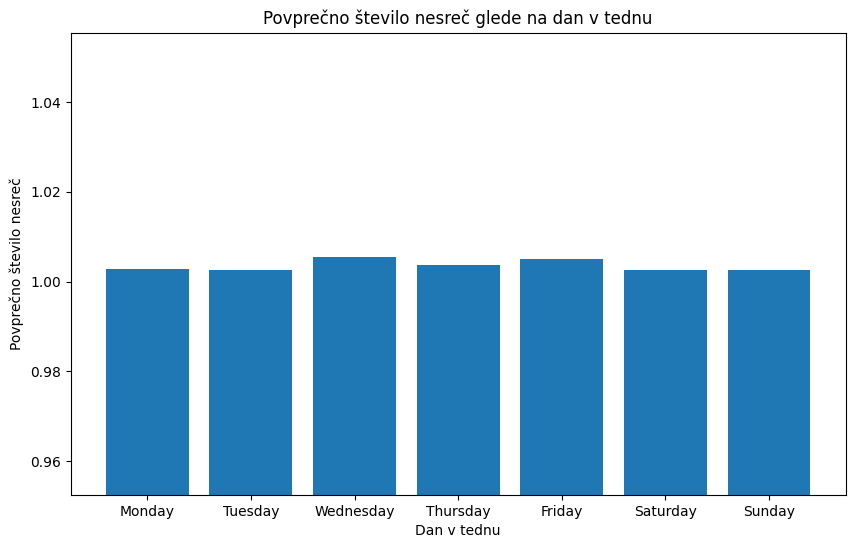

In [7]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(day_order, avg_accident_day)

# Prilagodi skalo y-osi, da bodo razlike bolj vidne
plt.ylim(min(avg_accident_day) - 0.05, max(avg_accident_day) + 0.05)

plt.xlabel('Dan v tednu')
plt.ylabel('Povprečno število nesreč')
plt.title('Povprečno število nesreč glede na dan v tednu')

plt.show()

## **Razlike med delovnikom in vikendom**

In [8]:
# Število nesreč med delovnikom in število nesreč med vikendom
accidents_workdays = sum(accident_counts_array[:5])
accidents_weekend = sum(accident_counts_array[-2:])

print(accidents_workdays)
print(accidents_weekend)

23904
9695


In [9]:
# Povprečje nesreč med delovnikom in povprečje nesreč med vikendom
avg_accidents_workdays = accidents_workdays / 5
avg_accidents_weekend = accidents_weekend / 2

print(avg_accidents_workdays, avg_accidents_weekend)

4780.8 4847.5


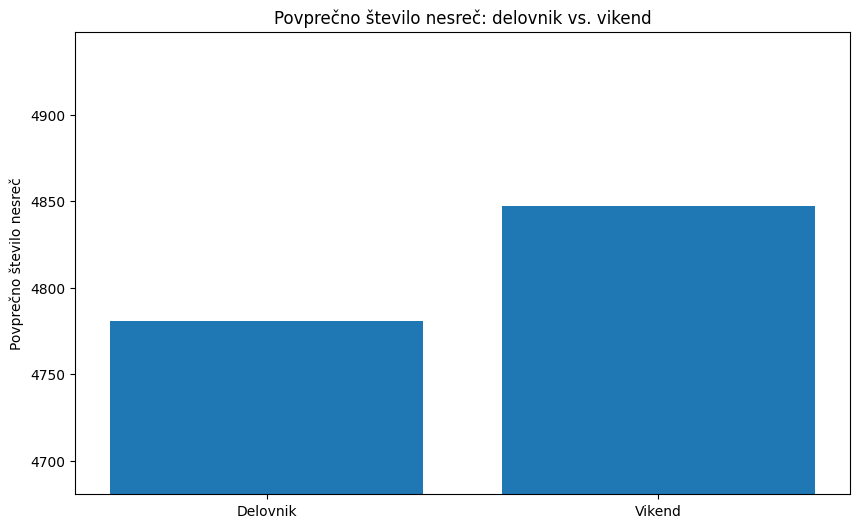

In [10]:
# Stolpčni diagram za povprečja
plt.figure(figsize=(10, 6))
plt.bar(["Delovnik", "Vikend"], [avg_accidents_workdays, avg_accidents_weekend])

# Prilagodi skalo y-osi, da bodo razlike bolj vidne
plt.ylim(min(avg_accidents_workdays, avg_accidents_weekend) - 100, max(avg_accidents_workdays, avg_accidents_weekend) + 100)

#plt.xlabel('Dan v tednu')
plt.ylabel('Povprečno število nesreč')
plt.title('Povprečno število nesreč: delovnik vs. vikend')

plt.show()

# **Resnost posledic prometnih nesreč**

Tri kategorije nesreč:
- **Nesreče brez poškodovancev**: udeleženci niso bili poškodovani in nihče ni umrl
- **Nesreče s poškodbami**: nekateri udeleženci so bili poškodovani, vendar nihče ni umrl
- **Nesreče s smrtnim izidom**: vsaj eden od udeležencev je umrl (v nesreči so bili lahko tudi drugi, ki so bili poškodovani, vendar take nesreče ne štejem v kategorijo "Nesreče s poškodbami")

### Število nesreč s poškodbami vs. število nesreč brez poškodb

In [11]:
# Število nesreč brez poškodovancev in smrtnih žrtev
mild_accidents_entries = data[(data['LjudjeMrtvi'] == 0) & (data['LjudjePoskodovani'] == 0)] 
mild_accidents = mild_accidents_entries.shape[0]   # .shape vrne (number of rows, number of columns), zato [0]

# Število vseh nesreč
row_count = len(data)

# Število nesreč, kjer so bili ljudje poškodovani ali pa so umrli
severe_accidents = row_count - mild_accidents

# Nesreče s poškodbami (vendar brez smrtnih žrtev)
injury_accidents_entries = data[(data['LjudjeMrtvi'] == 0) & (data['LjudjePoskodovani'] != 0)]
injury_accidents = injury_accidents_entries.shape[0]

# Nesreče s smrtnimi žrtvami
death_accidents_entries = data[(data['LjudjeMrtvi'] != 0)]
death_accidents = death_accidents_entries.shape[0]

print("Nesreče brez poškodovancev: ", mild_accidents)
print("Nesreče s poškodbami in/ali smrtnimi žrtvami: ", severe_accidents)
print("Nesreče s poškodbami: ", injury_accidents)
print("Nesreče s smrtnim izidom: ", death_accidents)

Nesreče brez poškodovancev:  9443
Nesreče s poškodbami in/ali smrtnimi žrtvami:  24156
Nesreče s poškodbami:  22931
Nesreče s smrtnim izidom:  1225


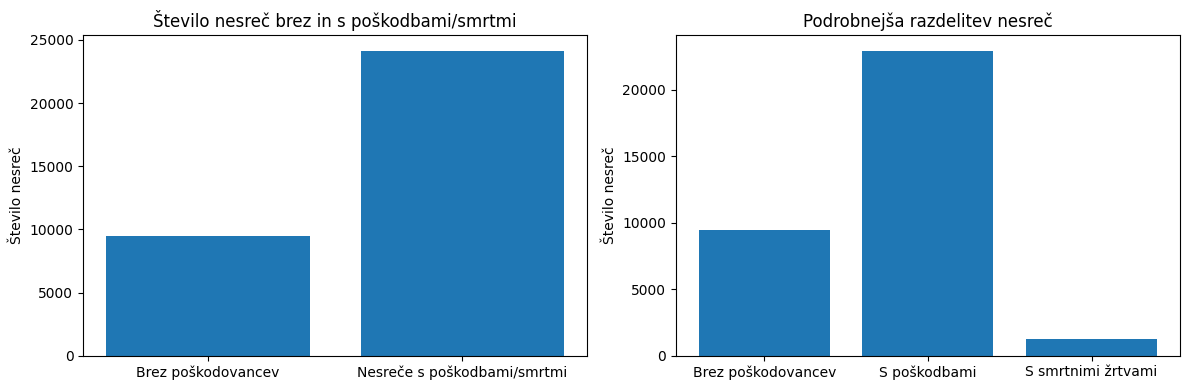

In [12]:
# Grafični prikaz
# Dva grafa - 1 vrstica, 2 stolpca
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(["Brez poškodovancev", "Nesreče s poškodbami/smrtmi"], [mild_accidents, severe_accidents])
axes[0].set_ylabel('Število nesreč')
axes[0].set_title('Število nesreč brez in s poškodbami/smrtmi')

axes[1].bar(["Brez poškodovancev", "S poškodbami", "S smrtnimi žrtvami"], [mild_accidents, injury_accidents, death_accidents])
axes[1].set_ylabel('Število nesreč')
axes[1].set_title('Podrobnejša razdelitev nesreč')

plt.tight_layout()
plt.show()

### Nesreče brez poškodovancev in brez smrtnih žrtev

In [13]:
# Za vsako nesrečo ugotovi, kateri dan je bila
mild_days = mild_accidents_entries['NastanekDatumCas'].dt.day_name()

# Koliko nesreč se je zgodilo v pon, koliko v tor...
mild_per_day = mild_days.value_counts()

mild_counts_array = [mild_per_day.get(day, 0) for day in day_order]

print(mild_counts_array)

[1321, 1215, 1238, 1380, 1628, 1471, 1190]


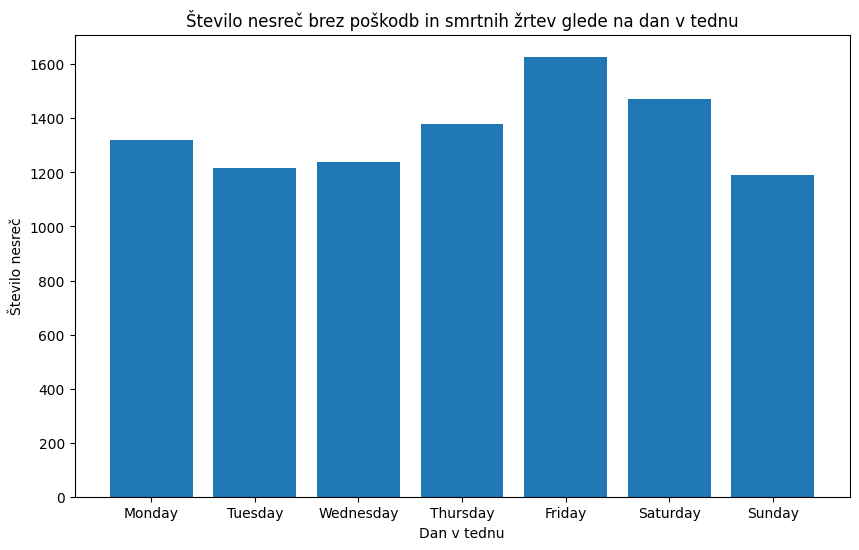

In [14]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(day_order, mild_counts_array)

plt.xlabel('Dan v tednu')
plt.ylabel('Število nesreč')
plt.title('Število nesreč brez poškodb in smrtnih žrtev glede na dan v tednu')

plt.show()

In [15]:
# POVPREČNO NA DAN

mild_dates_unique = mild_accidents_entries['NastanekDatumCas'].unique()
mild_dates_unique = pd.to_datetime(mild_dates_unique)     # Pretvori v pandas objekt, da lahko dobiš imena dni

# Pridobi imena dnevov iz datumov
mild_days_of_week_uniq = pd.Series(mild_dates_unique).dt.day_name()

# Preštej, kolikokrat se posamezen dan ponovi
mild_count_days = mild_days_of_week_uniq.value_counts()   # dnevi niso v pravem vrstnem redu

# Dneve postavi v pravi vrstni red
mild_count_days_in_order = [mild_count_days.get(day, 0) for day in day_order]

# Izračunaj povprečje za vsak dan (število nesreč, ki so se zgodile v ponedeljek deljeno s številom ponedeljkov, na katere se je zgodila vsaj ena nesreča )
mild_avg_accident_day = [mild_counts_array[i] / mild_count_days_in_order[i] for i in range(len(day_order))]

print(mild_avg_accident_day)

[1.0022761760242793, 1.0008237232289952, 1.0032414910858996, 1.0014513788098693, 1.001230012300123, 1.0, 1.0008410428931875]


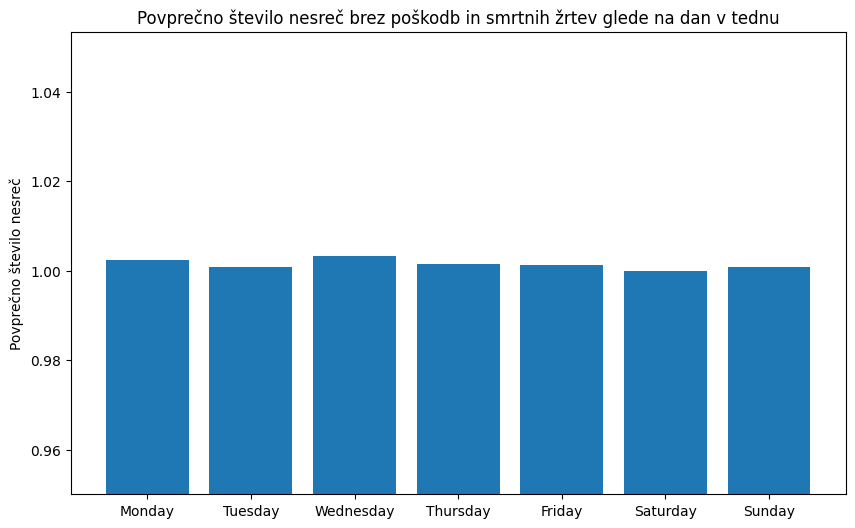

In [16]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(day_order, mild_avg_accident_day)

# Prilagodi skalo y-osi, da bodo razlike bolj vidne
plt.ylim(min(mild_avg_accident_day) - 0.05, max(mild_avg_accident_day) + 0.05)

plt.ylabel('Povprečno število nesreč')
plt.title('Povprečno število nesreč brez poškodb in smrtnih žrtev glede na dan v tednu')

plt.show()

### Nesreče, v katerih so bili udeleženci poškodovani

In [17]:
# Za vsako nesrečo ugotovi, kateri dan je bila
injury_days = injury_accidents_entries['NastanekDatumCas'].dt.day_name()

# Koliko nesreč se je zgodilo v pon, koliko v tor...
injury_per_day = injury_days.value_counts()

injury_counts_array = [injury_per_day.get(day, 0) for day in day_order]

print(injury_counts_array)

[3161, 2986, 3037, 3194, 3908, 3593, 3052]


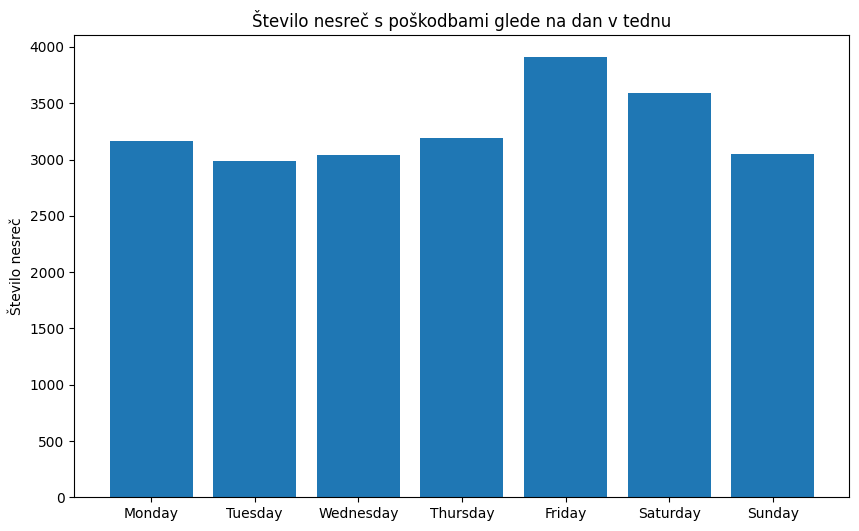

In [18]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(day_order, injury_counts_array)

plt.ylabel('Število nesreč')
plt.title('Število nesreč s poškodbami glede na dan v tednu')

plt.show()

In [19]:
# POVPREČNO NA DAN

injury_dates_unique = injury_accidents_entries['NastanekDatumCas'].unique()
injury_dates_unique = pd.to_datetime(injury_dates_unique)     # Pretvori v pandas objekt, da lahko dobiš imena dni

# Pridobi imena dnevov iz datumov
injury_days_of_week_uniq = pd.Series(injury_dates_unique).dt.day_name()

# Preštej, kolikokrat se posamezen dan ponovi
injury_count_days = injury_days_of_week_uniq.value_counts()   # dnevi niso v pravem vrstnem redu

# Dneve postavi v pravi vrstni red
injury_count_days_in_order = [injury_count_days.get(day, 0) for day in day_order]

# Izračunaj povprečje za vsak dan
injury_avg_accident_day = [injury_counts_array[i] / injury_count_days_in_order[i] for i in range(len(day_order))]

print(injury_avg_accident_day)

[1.0012670256572695, 1.0023497818059752, 1.0042989417989419, 1.0031407035175879, 1.0038530696121244, 1.001952035694367, 1.0022988505747126]


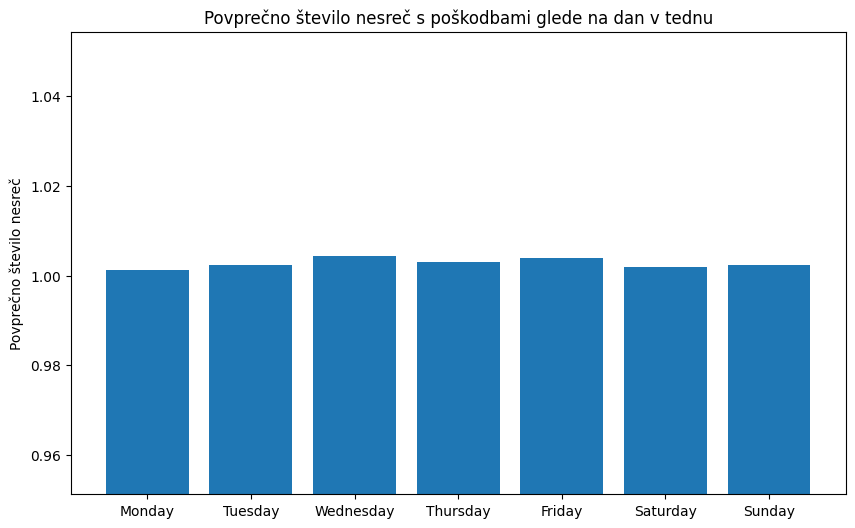

In [20]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(day_order, injury_avg_accident_day)

# Prilagodi skalo y-osi, da bodo razlike bolj vidne
plt.ylim(min(injury_avg_accident_day) - 0.05, max(injury_avg_accident_day) + 0.05)

plt.ylabel('Povprečno število nesreč')
plt.title('Povprečno število nesreč s poškodbami glede na dan v tednu')

plt.show()

### Nesreče s smrtnimi žrtvami

In [21]:
# Za vsako nesrečo ugotovi, kateri dan je bila
death_days = death_accidents_entries['NastanekDatumCas'].dt.day_name()

# Koliko nesreč se je zgodilo v pon, koliko v tor...
death_per_day = death_days.value_counts()

death_counts_array = [death_per_day.get(day, 0) for day in day_order]

print(death_counts_array)

[176, 142, 152, 187, 179, 203, 186]


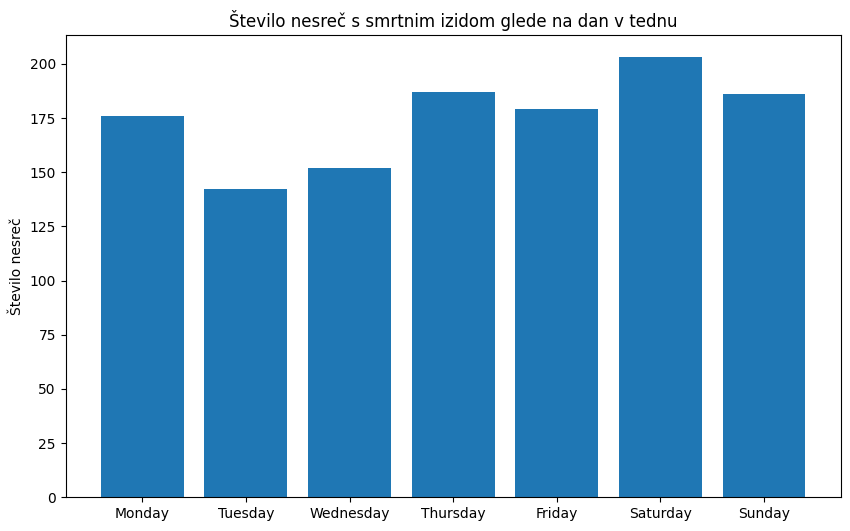

In [22]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(day_order, death_counts_array)

plt.ylabel('Število nesreč')
plt.title('Število nesreč s smrtnim izidom glede na dan v tednu')

plt.show()

In [23]:
# POVPREČNO NA DAN

death_dates_unique = death_accidents_entries['NastanekDatumCas'].unique()
death_dates_unique = pd.to_datetime(death_dates_unique)     # Pretvori v pandas objekt, da lahko dobiš imena dni

# Pridobi imena dnevov iz datumov
death_days_of_week_uniq = pd.Series(death_dates_unique).dt.day_name()

# Preštej, kolikokrat se posamezen dan ponovi
death_count_days = death_days_of_week_uniq.value_counts()   # dnevi niso v pravem vrstnem redu

# Dneve postavi v pravi vrstni red
death_count_days_in_order = [death_count_days.get(day, 0) for day in day_order]

# Izračunaj povprečje za vsak dan
death_avg_accident_day = [death_counts_array[i] / death_count_days_in_order[i] for i in range(len(day_order))]

print(death_avg_accident_day)

[1.0, 1.0, 1.0, 1.0053763440860215, 1.0056179775280898, 1.004950495049505, 1.0163934426229508]


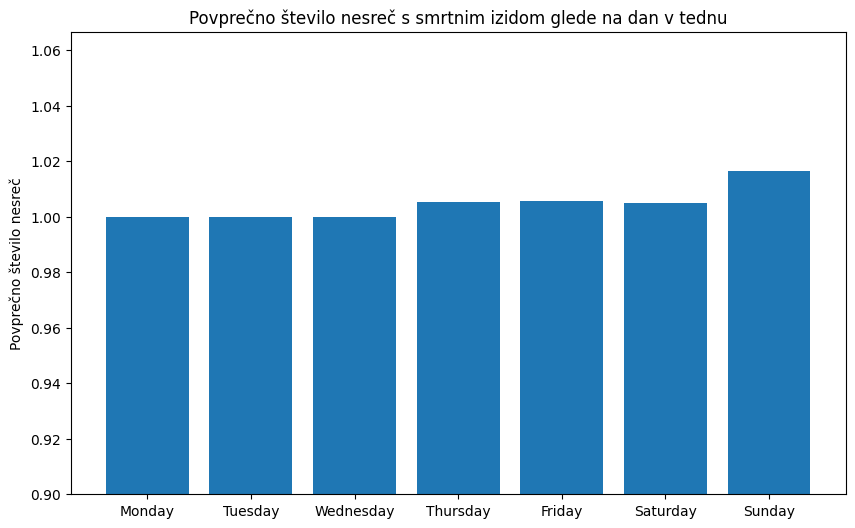

In [24]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(day_order, death_avg_accident_day)

# Prilagodi skalo y-osi, da bodo razlike bolj vidne
plt.ylim(min(death_avg_accident_day) - 0.1, max(death_avg_accident_day) + 0.05)

plt.ylabel('Povprečno število nesreč')
plt.title('Povprečno število nesreč s smrtnim izidom glede na dan v tednu')

plt.show()

#### **Interpretacija**
- Za soboto lahko vidimo, da so prometne nesreče s smrtnim izidom razporejene čez večje število sobot. Za petek pa lahko vidimo, da so razporejene čez manjše število petkov. Predvidevamo lahko, da se petkove nesreče dogajajo samo v določenem obdobju (recimo poleti).
- Torek in sreda imata približno isto število prometnih nesreč s smrtnim izidom (511 in 499). Vendar se v drugem grafu precej razlikujeta. Kar pomeni, da je število torkov, na katere se zgodi prometna nesreča s smrtnim izidom, precej manjše kakor število sred.

### Prikaz števila vseh treh kategorij nesreč

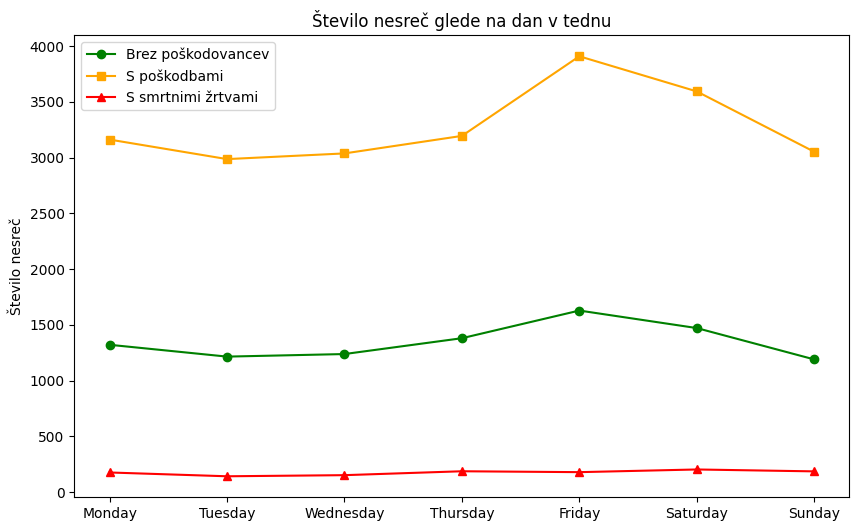

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(day_order, mild_counts_array, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(day_order, injury_counts_array, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(day_order, death_counts_array, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.ylabel('Število nesreč')
plt.title('Število nesreč glede na dan v tednu')
plt.legend()

plt.show()

### Prikaz normaliziranih vrednosti za lažjo primerjavo

X_norm = (X - X_min) / (X_max - X_min)

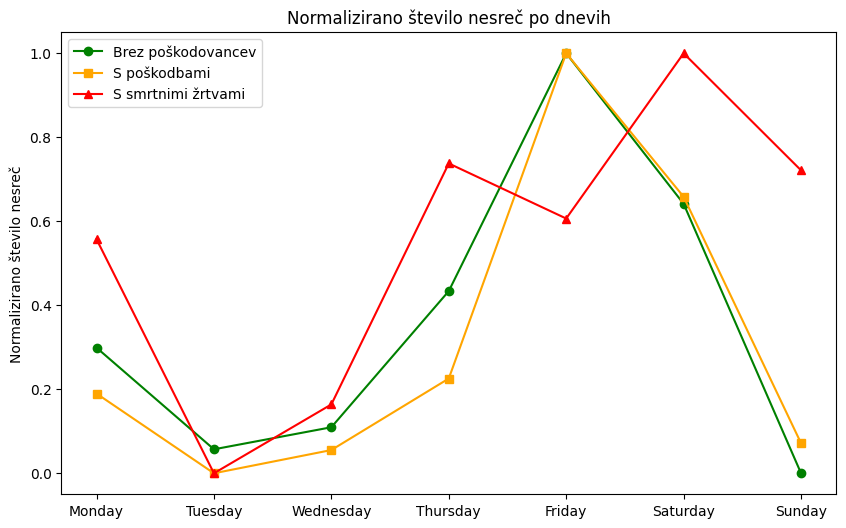

In [26]:
# Normaliziranje
mild_norm = (mild_counts_array - np.min(mild_counts_array)) / (np.max(mild_counts_array) - np.min(mild_counts_array))
injury_norm = (injury_counts_array - np.min(injury_counts_array)) / (np.max(injury_counts_array) - np.min(injury_counts_array))
death_norm = (death_counts_array - np.min(death_counts_array)) / (np.max(death_counts_array) - np.min(death_counts_array))

plt.figure(figsize=(10, 6))

plt.plot(day_order, mild_norm, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(day_order, injury_norm, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(day_order, death_norm, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.ylabel('Normalizirano število nesreč')
plt.title('Normalizirano število nesreč po dnevih')
plt.legend()

plt.show()
